# ML Project on Titanic Passenger Survival

The project is based on titanic prassenger survial competition . wheather the passenger survive or not.
Different Machine Learning Classification Algorithms are used to gain the maximum accuracy.


In [2]:
# importing the data manipulation and visualization libaray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the training and testing dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


The data is already split into a training set and a test set

In [4]:
# let's take a look at train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The attributes have the following meaning:

PassengerId: a unique identifier for each passenger 

Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.

Pclass: passenger class.

Name, Sex, Age: self-explanatory

SibSp: how many siblings & spouses of the passenger aboard the Titanic.

Parch: how many children & parents of the passenger aboard the Titanic.

Ticket: ticket id

Fare: price paid (in pounds)

Cabin: passenger's cabin number

Embarked: where the passenger embarked the Titanic

EDA

In [10]:
train.shape

(891, 12)

In [15]:
# explicitly setting passengerId column as Index columns
train.set_index("PassengerId",inplace=True)

In [16]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
# features available in train
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
# median age of male and female passengers
print("Average Age of Male Passengers: ",train[train["Sex"]=="male"]["Age"].median())
print("Average Age of Eemale Passengers: ",train[train["Sex"]=="female"]["Age"].median())



Average Age of Male Passengers:  29.0
Average Age of Eemale Passengers:  27.0


In [40]:
# summary of the train dataset
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the summary of the train dataset only 40% of the passenger survived

In [42]:
# finding the null values in train and test
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [43]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
def missing (train):
    missing_number = train.isnull().sum().sort_values(ascending=False)
    missing_percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [45]:
missing(train)

,Missing_Number,Missing_Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [46]:
missing(test)

,Missing_Number,Missing_Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


Age, cabin and Embarked contains the missing value 

In [47]:
# Now lets check the target
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
# lets check the other categorical attributes
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [49]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [50]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

Preprocessing Pipeline for numerical varibles

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

Pipeline for categorical variables


In [54]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ("inputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])


Combining the pipelines

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age","SibSp","Parch","Fare"]
cat_attribs = ["Embarked","Sex","Pclass"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [63]:
# preprocesss the train data
X_train=preprocess_pipeline.fit_transform(train[num_attribs+cat_attribs])
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

Lebels

In [64]:
y_train=train["Survived"]

Train data is prepared for the machine learning Algorithms


First Model is Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
# prediction on test data
X_test=preprocess_pipeline.transform(test[num_attribs+cat_attribs])
y_pred= model1.predict(X_test)

In [71]:
# checking model performance with cross validation score
from sklearn.model_selection import cross_val_score
forest_scores=cross_val_score(forest_clf,X_train,y_train,cv=10)
forest_scores.mean()

0.8081647940074907

Second model is Support vector classifier

In [72]:
from sklearn.svm import SVC
svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train,y_train)

SVC(gamma='auto')

In [74]:
y_pred=svc_clf.predict(X_test)
svc_scores=cross_val_score(svc_clf,X_train,y_train,cv=10)
svc_scores.mean()

0.8249313358302123

In [197]:
from sklearn.metrics import classification_report
predictions=svc_clf.predict(X_train)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



SVC model perform better than the Random Forest Classifier

Third Model is Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [79]:
y_pred=tree_clf.predict(X_train)
tree_scores=cross_val_score(tree_clf,X_train,y_train,cv=10)
tree_scores.mean()

0.7912983770287141

Fourth Model is KNeighbors Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)


KNeighborsClassifier()

In [82]:
y_pred=knn_clf.predict(X_test)
knn_scores = cross_val_score(knn_clf,X_train,y_train,cv=10)
knn_scores.mean()

0.8058676654182273

From the four classfication used above SVC preforms best

Lets visualize the individual cross val scores of different model through box plot

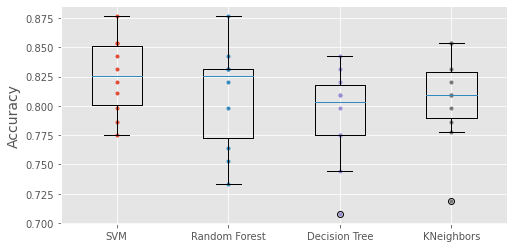

In [87]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svc_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, tree_scores, ".")
plt.plot([4]*10, knn_scores, ".")

plt.boxplot([svc_scores, forest_scores,tree_scores,knn_scores], 
            labels=("SVM","Random Forest","Decision Tree","KNeighbors"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

From the boxplot SVM genelizes well with the datasets

Models can be further optimized by hyperparameter tuning using Grid search cv and feature engineering.

Feature Engeneering

In [114]:
# Age column can group in passengers with different age groups
train["AgeBucket"] = train["Age"] // 15 * 15
train[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [115]:
# SibSp and Parch columns can be replaced by RelativeOnboard columns
train["RelativesOnboard"] = train["SibSp"] + train["Parch"]
train[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [116]:
# SibSp and Parch columns can be replaced by RelativeOnboard columns
test["RelativesOnboard"] = test["SibSp"] + train["Parch"]
test["AgeBucket"] = test["Age"] // 15 * 15


In [141]:
feature_train=train.drop(["Age","SibSp","Parch"],axis=1)
feature_train.head()

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,S,15.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,30.0,1
3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,S,15.0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,30.0,1
5,0,3,"Allen, Mr. William Henry",male,373450,8.0500,NaN,S,30.0,0


In [142]:
feature_train.isna().sum()

Survived              0
Pclass                0
Name                  0
Sex                   0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
AgeBucket           177
RelativesOnboard      0
dtype: int64

In [143]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Ticket            891 non-null    object 
 5   Fare              891 non-null    float64
 6   Cabin             204 non-null    object 
 7   Embarked          889 non-null    object 
 8   AgeBucket         714 non-null    float64
 9   RelativesOnboard  891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 108.9+ KB


In [144]:
feature_test=test.drop(["Age","SibSp","Parch"],axis=1)
feature_test.head()

,PassengerId,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
0,892,3,"Kelly, Mr. James",male,330911,7.8292,NaN,Q,30.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,363272,7.0000,NaN,S,45.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,240276,9.6875,NaN,Q,60.0,0.0
3,895,3,"Wirz, Mr. Albert",male,315154,8.6625,NaN,S,15.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,12.2875,NaN,S,15.0,1.0


In [145]:
feature_test.isna().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Ticket                0
Fare                  1
Cabin               327
Embarked              0
AgeBucket            86
RelativesOnboard      1
dtype: int64

In [146]:
feature_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Ticket            418 non-null    object 
 5   Fare              417 non-null    float64
 6   Cabin             91 non-null     object 
 7   Embarked          418 non-null    object 
 8   AgeBucket         332 non-null    float64
 9   RelativesOnboard  417 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 32.8+ KB


In [147]:
f_num_attribs = ["AgeBucket","RelativesOnboard","Fare"]
f_cat_attribs = ["Embarked","Sex","Pclass"]
f_preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, f_num_attribs),
    ("cat", cat_pipeline, f_cat_attribs),
])
yfeature_train=feature_train["Survived"]
Xfeature_train=f_preprocess_pipeline.fit_transform(feature_train[f_num_attribs+f_cat_attribs])
Xfeature_test=f_preprocess_pipeline.transform(feature_test[f_num_attribs+f_cat_attribs])

In [190]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(Xfeature_train, yfeature_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.798 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.826 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.826 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [191]:
print(grid.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [192]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


Using the GridSearchCV() we increase the preformance of the model by 3%


In [204]:
from sklearn.metrics import classification_report
predictions=grid.predict(Xfeature_train)
print(classification_report(yfeature_train,predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       549
           1       0.90      0.67      0.77       342

    accuracy                           0.84       891
   macro avg       0.86      0.81      0.82       891
weighted avg       0.85      0.84      0.84       891



In [206]:
svc2_clf=SVC(C=10,gamma=0.1)
svc2_clf.fit(Xfeature_train,yfeature_train)
svc2_clf.predict(Xfeature_test)
svc2_scores=cross_val_score(svc2_clf,Xfeature_train,yfeature_train,cv=10)
svc2_scores.mean()


0.833932584269663